In [1]:
import numpy as np #for mathematical operations and statistics
%matplotlib inline 
    #make things look and visuals work right
import matplotlib.pyplot as plt #for visualizatiosn and graphics of data
plt.style.use('seaborn-white')
import scipy.stats as stats
import seaborn as sbn #pretty plots
import pandas as pd #read and tabulize data

## Stuff that is just taken from beginning of FP file

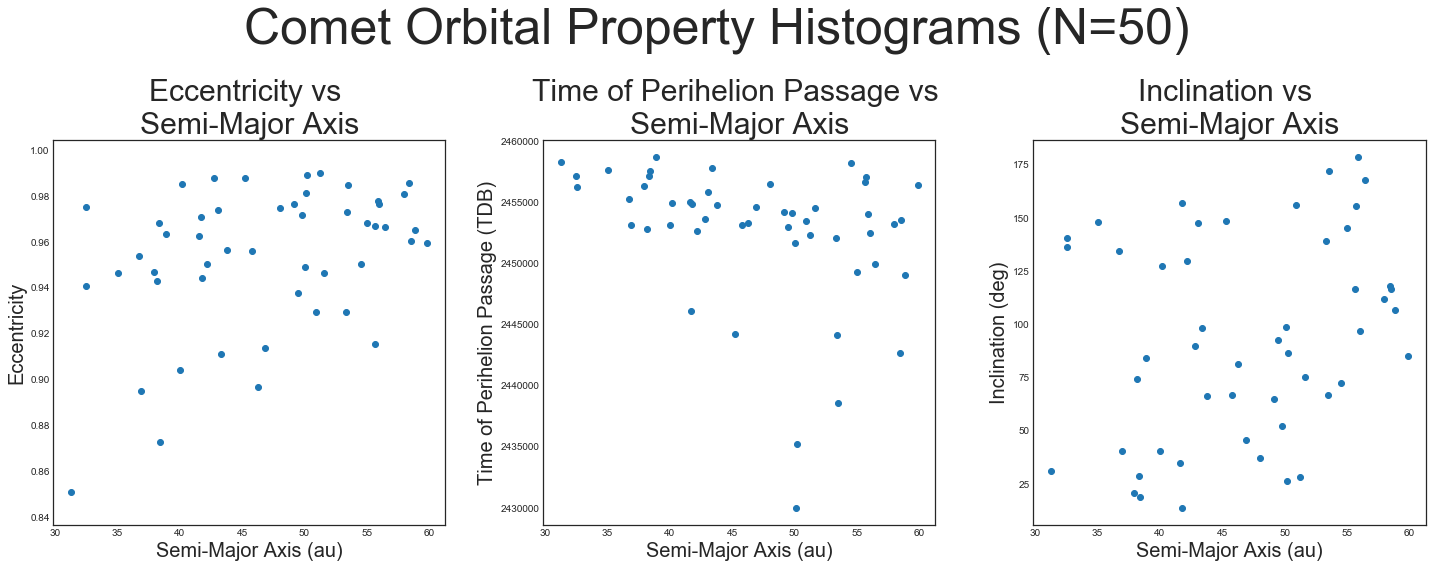

In [2]:
data=pd.read_csv('jpl.csv') #reads data from csv as a table (rows and columns)

#plot Exploratory variable scatterplots - 2x2 subplots
fig2,ax = plt.subplots(1, 3,figsize=(20,8),sharex=False,sharey=False)
fig2.suptitle("Comet Orbital Property Histograms (N=50)",fontsize=50, ha='center') #main title

ax[0].scatter(x=data['semi-major axis (au)'],y=data['eccentricity'])
ax[1].scatter(x=data['semi-major axis (au)'],y=data['TP (TDB)'])
ax[2].scatter(x=data['semi-major axis (au)'],y=data['inclination (deg)'])

ax[0].set_title("Eccentricity vs \nSemi-Major Axis",fontsize=30)
ax[1].set_title("Time of Perihelion Passage vs \nSemi-Major Axis",fontsize=30)
ax[2].set_title("Inclination vs \nSemi-Major Axis",fontsize=30)

ax[1].set_xlabel("Semi-Major Axis (au)",fontsize=25)

ax[0].set_ylabel("Eccentricity",fontsize=20)
ax[1].set_ylabel("Time of Perihelion Passage (TDB)",fontsize=20)
ax[2].set_ylabel("Inclination (deg)",fontsize=20)

fig2.tight_layout() #prevent overlaps of subplots data and labels
fig2.subplots_adjust(top=0.75) #so that title does not overlap over subplots
fig2.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

# Doing the stuff

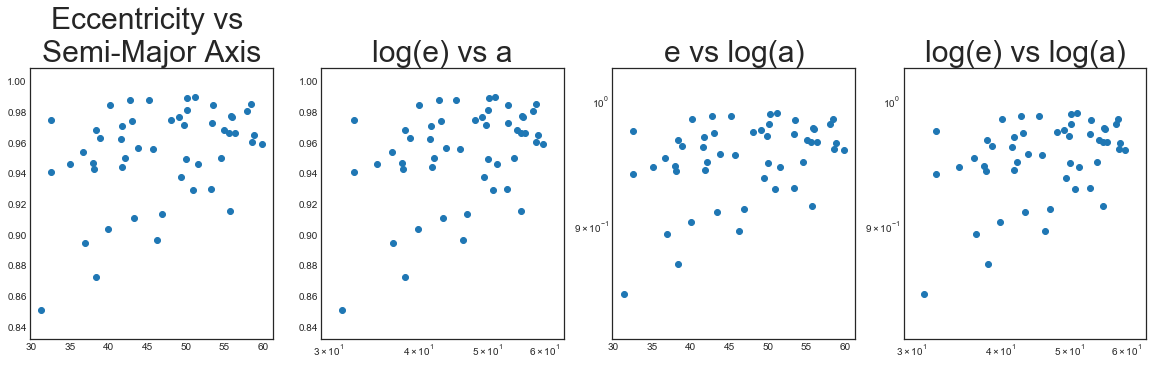

In [18]:
#plot Exploratory variable scatterplots - 2x2 subplots
fig3,ax = plt.subplots(1, 4,figsize=(20,5),sharex=False,sharey=False)
ax[1].set_xscale('log')
ax[2].set_yscale('log')
ax[3].set_xscale('log')
ax[3].set_yscale('log')

ax[0].scatter(x=data['semi-major axis (au)'],y=data['eccentricity'])
ax[1].scatter(x=data['semi-major axis (au)'],y=data['eccentricity'])
ax[2].scatter(x=data['semi-major axis (au)'],y=data['eccentricity'])
ax[3].scatter(x=data['semi-major axis (au)'],y=data['eccentricity'])

ax[0].set_title("Eccentricity vs \nSemi-Major Axis",fontsize=30)
ax[1].set_title("log(e) vs a",fontsize=30)
ax[2].set_title("e vs log(a)",fontsize=30)
ax[3].set_title("log(e) vs log(a)",fontsize=30)

#ax[0].set_ylabel("Eccentricity",fontsize=20)

plt.show()

### Thoughts:
Log scaling did not provide any new or improved insight. None of the log-linear, linear-log, or log-log spaces produced a more clear trend than lin-lin space does. Therefore, I stick to lin-lin space.

In [15]:
def hypTest(xs,ys,signif=0.05,N=10000,nbins=100):
    """
    Performs two sided Bayesian hypothesis test
    Null hypothesis = data provided belongs to distribution 
    Alt = data doesn't belong to distribution
    
    Input:
    xs - array of x values
    ys - array of y values 
    signif = signficance value, 0.05 is the default
    N = number of samples to take to determine c.d.f. default is 10000
    nbins = number of bins in the hist, 100 is the default
    
    output:
    if true, null hypothesis cannot be rejected
    if false, null hypothesis is rejected
   """
    #Does linear regression and returns the slope and the correlation value (r)
    d = stats.linregress(xs,ys)
    dH=d[0]
    dr = d[2]
    #The simulation uses the HubbleSim function to get data points in order to find c.d.f. 
    sim=HubbleSim(N)
    #Makes c.d.f. histogram and takes its parameters
    (cdfvals,bins,_)=plt.hist(sim[:,0],bins = nbins,density=True,cumulative=True)
    #Finds which bin where H of the data should belong
    loc = np.searchsorted(bins,[dH])
    #if/elif statements to perform hypothesis test
    
    if loc == 0:
        side1= True
    elif loc ==nbins+1 and cdfvals[nbins-1]<1-signif:
        side1= False
    elif loc ==nbins+1 and cdfvals[nbins-1]>=1-signif:
        side1= False
    elif cdfvals[loc-1] >=1-signif:
        side1= False
    elif cdfvals[loc-1]<1-signif:
        side1= True

    if loc==nbins+1:
        side2=True
    elif loc == 0 and cdfvals[0]<=signif:
        side2= False
    elif loc ==0 and cdfvals[0]>signif:
        side2= True
    elif cdfvals[loc-1] <=signif:
        side2= False
    elif cdfvals[loc-1]>signif:
        side2= True
    return (side1 and side2)
#print(bsize)

x_samp = d1[i,:,0]
y_samp = d1[i,:,1]
hyptest(x_samp,y_samp,N=1000,nbins=20,signif=0.01)

NameError: name 'data1' is not defined

In [13]:
#correlation test and prints out all other data for given dataframe and test type
def correlations(variable1,variable2, testtype, seeMatrices=False):
    if seeMatrices==True:
        #Print covariance matrix and correlation matrix
        print('\t\tCovariance matrix:\n\t\t\t',str(np.cov(variable1,variable2)[0]),'\n\t\t\t',str(np.cov(variable1,variable2)[1]))
        print('\t\tCorrelation matrix:\n\t\t\t',str(np.corrcoef(variable1,variable2)[0]),'\n\t\t\t',str(np.corrcoef(variable1,variable2)[1]))

    #Pearson correlation test
    if testtype=='Pearson':
        print('\tPearson correlation test')
        #Print results of correlation test
        print('\t\tCorrelation:\n\t\t\t'+str(stats.pearsonr(variable1,variable2)))
        
    #Spearman correlation test
    elif testtype=='Spearman':
        print('\tSpearman correlation test')
        #Print test results
        print('\t\tCorrelation:\n\t\t\t'+str(stats.spearmanr(variable1,variable2)))
        
    #Kendall tau correlation test
    elif testtype=='Kendalltau':
        print('\tKendall tau correlation test')
        #Print test results
        print('\t\tCorrelation:\n\t\t\t'+str(stats.kendalltau(variable1,variable2)))

In [14]:
#Pearson correlation test and matrices for all planets
print('Correlation tests for Eccentricity and Semi-Major Axis data')
correlations(data['semi-major axis (au)'],data['eccentricity'],'Pearson',True)
#Spearman correlation test and matrices for all planets
correlations(data['semi-major axis (au)'],data['eccentricity'],'Spearman')
#Kendall tau correlation test and matrices for all planets
correlations(data['semi-major axis (au)'],data['eccentricity'],'Kendalltau')

Correlation tests for Eccentricity and Semi-Major Axis data
		Covariance matrix:
			 [63.08880012  0.09428805] 
			 [0.09428805 0.0009702 ]
		Correlation matrix:
			 [1.         0.38110954] 
			 [0.38110954 1.        ]
	Pearson correlation test
		Correlation:
			(0.3811095356139044, 0.006322258447553609)
	Spearman correlation test
		Correlation:
			SpearmanrResult(correlation=0.3406002400960384, pvalue=0.015505691198651661)
	Kendall tau correlation test
		Correlation:
			KendalltauResult(correlation=0.2310204081632653, pvalue=0.017920592898864003)
